## **Image Classification**

- Fmnist data image classification using CNN architecture

In [1]:
# import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# check the python version
print(tf.__version__)

2.18.0


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [4]:
# load the fashion mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# sepratae the training and testing data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step 
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step


In [5]:
# shape of each dataset
print("Train images shape: ", train_images.shape)
print("Train labels shape: ", train_labels.shape)
print("Test images shape: ", test_images.shape)
print("Test labels shape: ", test_labels.shape)

Train images shape:  (60000, 28, 28)
Train labels shape:  (60000,)
Test images shape:  (10000, 28, 28)
Test labels shape:  (10000,)


Text(0.5, 0, '7')

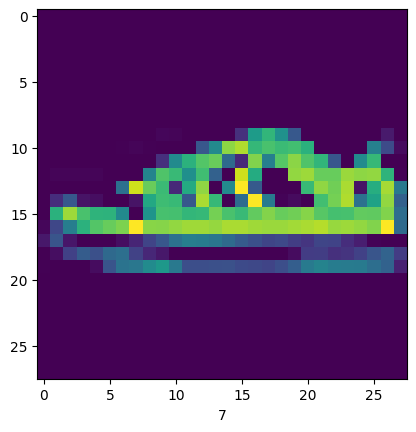

In [7]:
plt.imshow(train_images[5500])
plt.xlabel(train_labels[5500])

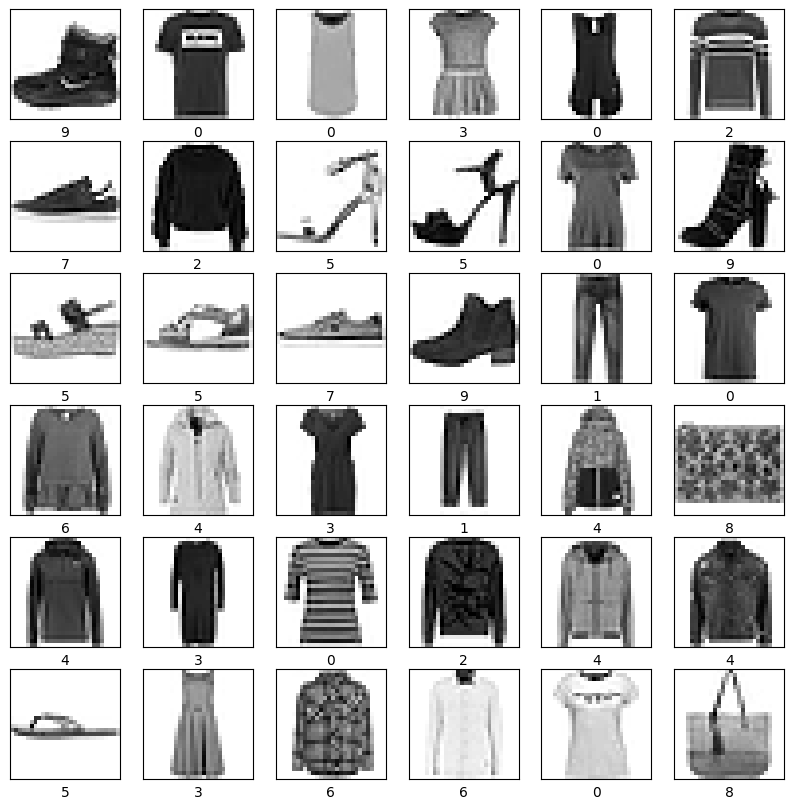

In [13]:
# display some sample images
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [14]:
len(train_images)

60000

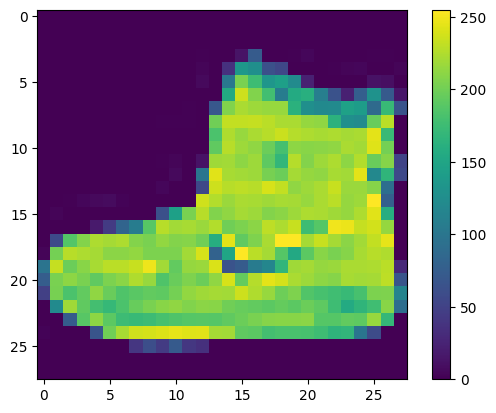

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
# Display the value of each pixel in the image
plt.figure(figsize=(10, 10))
for row in train_images[0]:
    for pixel in row:
        print("{:3} ".format(pixel), end="")
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3 
  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15 
  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66 
  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 215 213 164 127 

<Figure size 1000x1000 with 0 Axes>

- Converting int to float values

In [18]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

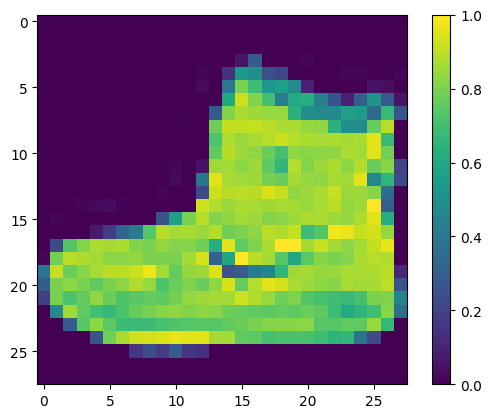

In [19]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pixel values:
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00392 0.0 0.0 0.051 0.286 0.0 0.0 0.00392 0.0157 0.0 0.0 0.0 0.0 0.00392 0.00392 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0118 0.0 0.141 0.533 0.498 0.243 0.212 0.0 0.0 0.0 0.00392 0.0118 0.0157 0.0 0.0 0.0118 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0235 0.0 0.4 0.8 0.69 0.525 0.565 0.482 0.0902 0.0 0.0 0.0 0.0 0.0471 0.0392 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.608 0.925 0.812 0.698 0.42 0.612 0.631 0.427 0.251 0.0902 0.302 0.51 0.282 0.0588 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00392 0.0 0.271 0.812 0.875 0.855 0.847 0.847 0.639 0

<Figure size 640x480 with 0 Axes>

<Axes: >

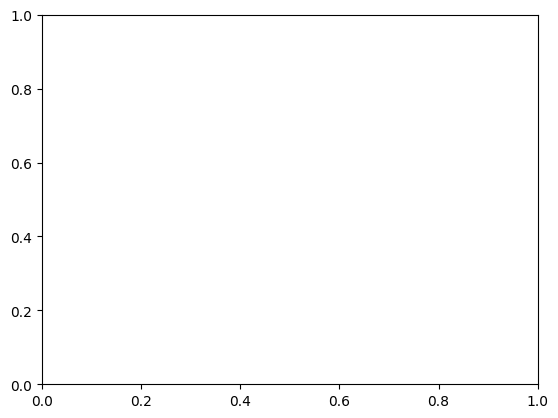

In [20]:
# Display the values of each pixel in the image
print("Pixel values:")
for row in train_images[0]:
    for pixel in row:
        print("{:0.3}".format(pixel), end=" ")
    print()
display(plt.gcf())
display(plt.gca())

In [21]:
# Reshape the test images to have a channel Dimension
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [24]:
# create model
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)), # input layer
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), # convolutional layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # pooling layer
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), # convolutional layer
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), # pooling layer
    tf.keras.layers.Flatten(), # flatten layer
    tf.keras.layers.Dense(10, activation='softmax') # output layer
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary() # display the model summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# train the model
model.fit(train_images, train_labels, epochs=20, batch_size=16, validation_split=0.2)

Epoch 1/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.7703 - loss: 0.6352 - val_accuracy: 0.8675 - val_loss: 0.3647
Epoch 2/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.8770 - loss: 0.3389 - val_accuracy: 0.8771 - val_loss: 0.3459
Epoch 3/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.8972 - loss: 0.2847 - val_accuracy: 0.8858 - val_loss: 0.3015
Epoch 4/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.9072 - loss: 0.2536 - val_accuracy: 0.8978 - val_loss: 0.2847
Epoch 5/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 46s 15ms/step - accuracy: 0.9137 - loss: 0.2362 - val_accuracy: 0.8878 - val_loss: 0.3082
Epoch 6/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9231 - loss: 0.2090 - val_accuracy: 0.9074 - val_loss: 0.2664
Epoch 7/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - accuracy: 0.9298 - loss: 0.1894 - val_accuracy: 0.9060 - val_loss: 0.2661
Epoch 8/20
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.9356 -

In [26]:
# model evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy: ", test_acc)
print("\nTest loss: ", test_loss)

313/313 - 2s - 5ms/step - accuracy: 0.8928 - loss: 0.4306

Test accuracy:  0.892799973487854

Test loss:  0.4306303858757019


In [27]:
# save the model
model.save('models/fashion_mnist_model.h5')

## **Make Predictions**

In [28]:
test_images.shape

(10000, 28, 28, 1)

In [29]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [30]:
test_labels[50]

np.uint8(4)

In [31]:
predictions[0]

array([3.5437235e-16, 2.2934943e-18, 8.4409855e-14, 3.3011752e-15,
       4.0952100e-20, 2.8634051e-07, 2.1347513e-15, 2.4804384e-08,
       5.0536645e-14, 9.9999976e-01], dtype=float32)

In [32]:
np.argmax(predictions[50])

np.int64(6)

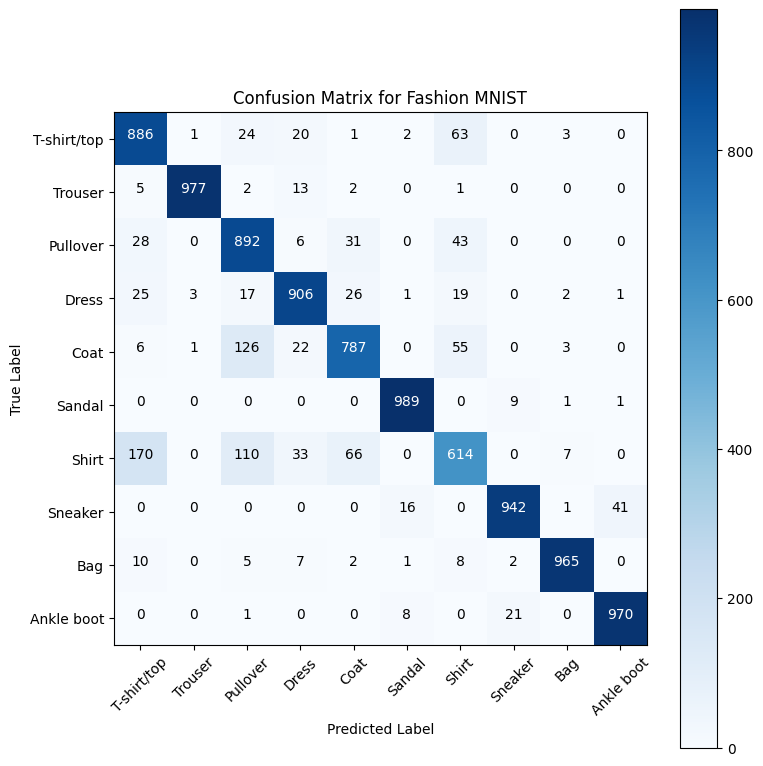

In [33]:
# draw a confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and obtained the predicted labels and true labels
# predicted_labels and true_labels are NumPy arrays containing the predicted and true labels respectively

# Convert continuous predictions to discrete class labels
predicted_labels = np.argmax(predictions, axis=1)
# Create the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Define the class labels for Fashion MNIST (assuming there are 10 classes)
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
                'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Fashion MNIST')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add values to the confusion matrix plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()